In [ ]:
# Margaret Johnston
# Homework 3 - due 14 February

I couldn't get my code to work entirely correctly. I based my Newton-Raphson function on the function "newtonraphsonbacktracking" from class, and modified it to work for a two equation system.

My function is able to run:
- it takes in the necessary quantities and spits out numbers
- it calculates the partial derivatives
- it calculates the $\Delta x$ using the partial derivatives
- it iteratively updates the original guess and calculates a new guess

My code has with two problems I'm not sure how to fix:
- the code does not converge (subsequent values of f do not approach zero) unless $x_1=2$ and $x_2=3$ in which case the system converges immediately (this seems to be the point we should converge toward)
- the second while loop runs infinitely for many values of $(x_1,x_2)$ which indicates that the changes to $\Delta x$ are not being propogated through to the rest of the code when in the while loop

I've done my best to have clear debugging text and comments, but haven't been able to determine what is wrong.

# Homework:

Homework: use the Newton-Raphson method to solve equation arrays

\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}
Hint: first you need to derive the partical derivative of the equation arrays. You can do it either analytically by hand or numerically using method we learned in the last lecture.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

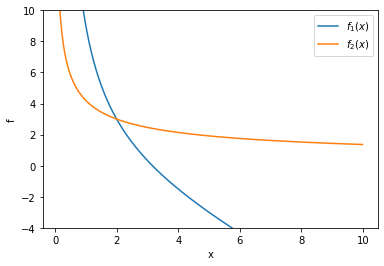

In [2]:
# f1 in terms of x2
def f1(x):
    return (10.-x*x)/x

# f2 in terms of x2
def f2(x):
    return (-1+np.sqrt(1.+4.*3.*x*57))/6./x

# Draw graphics to get a sense of the problem
x = np.arange(0.1, 10.0, 0.01)

plt.plot(x,f1(x),label='$f_{1}(x)$')
plt.plot(x,f2(x),label='$f_{2}(x)$')
plt.xlabel('x')
plt.ylabel('f')
plt.ylim([-4,10])
plt.legend()
plt.show()

In [3]:
# defining f1, f2, and d/dx in terms of x1 and x2
def f1_2(x1,x2):
    f1 = x1*x1 + x1*x2 - 10
    return f1

def f2_2(x1,x2):
    f2 = x2 + 3*x1*x2*x2 - 57
    return f2

def dydx_cd_2(y,x_part,x_const,dx):
    dydx = (y(x_part+dx/2,x_const)-y(x_part-dx/2,x_const))/dx
    return dydx

# setting up the Newton-Raphson method
def NR_system(x0,dx,Nmax,eps):
    for iii in range(0,Nmax):
        # calculate the partials
        F[0,0] = dydx_cd_2(f1_2,x0[0],x0[1],dx)
        F[0,1] = dydx_cd_2(f1_2,x0[1],x0[0],dx)
        F[1,0] = dydx_cd_2(f2_2,x0[0],x0[1],dx)
        F[1,1] = dydx_cd_2(f2_2,x0[1],x0[0],dx)
        
        # calculate delta x, using elements of F
        delx1 = (F[0,1]*f2_2(x0[0],x0[1])-F[1,1]*f1_2(x0[0],x0[1]))/(F[0,0]*F[1,1]-F[0,1]*F[1,0])
        delx2 = (F[1,0]*f1_2(x0[0],x0[1])-F[0,0]*f2_2(x0[0],x0[1]))/(F[0,0]*F[1,1]-F[0,1]*F[1,0])
        
        # decreasing delta x in case of false extrema (backtracking safety)
        if do_while==True: 
            while (abs(f1_2(x0[0]+delx1,x0[1]+delx2))>abs(f1_2(x0[0],x0[1]))):
                delx1 = delx1/2.
                if debug > 2:
                    print("  in while 1")
                    print("    x0={}{}   f={}{}   delx={}{}".format(x0[0],x0[1],f1_2(x0[0],x0[1]),f2_2(x0[0],x0[1]),delx1,delx2))
            while (abs(f2_2(x0[0]+delx1,x0[1]+delx2))>abs(f2_2(x0[0],x0[1]))):
                delx2 = delx2/2.
                if debug > 2:
                    print("  in while 2")
                    print("    x0={}{}   f={}{}   delx={}{}".format(x0[0],x0[1],f1_2(x0[0],x0[1]),f2_2(x0[0],x0[1]),delx1,delx2))
        
        # what have we got so far
        if debug > 1:
            print("-- -- -- -- --")
            print("round {}".format(iii))
            print("x0={}{}   f={}{}   delx={}{}".format(x0[0],x0[1],f1_2(x0[0],x0[1]),f2_2(x0[0],x0[1]),delx1,delx2))
            print("-- -- -- -- --")
        
        # update the guess
        x0[0] += delx1
        x0[1] += delx2
        
        # end the loop if we find the root
        if(abs(f1_2(x0[0],x0[1]))<eps and abs(f2_2(x0[0],x0[1]))<eps):
            print("Root is at (x1,x2){}{} after {} iterations, with a precision of {}".format(x0[0],x0[1],iii,abs(f1_2(x0[0],x0[1]))))
            break
    if iii == Nmax-1:
        print("The root was not found after {} iterations. The intermediate x0 is :{}{}".format(Nmax,x0[0],x0[1]))
    # return x0

In [4]:
# initialize x1, x2
x0 = np.zeros((2,1))
x0[0] = 2 # x1
x0[1] = 3.1 # x2

# initialize F
F = np.zeros((2,2))

# set up for Newton-Raphson
dx = 0.1
eps = 1e-8
nmax = 15 # CAUTION: while statement 2 fails if nmax>12 leave do_while on False for large nmax

# set debug=0 for no debugging text
# set debug=2 for if loop text
# set debug=3 for while loop text
debug = 0
do_while = False
NR_system(x0,dx,nmax,eps)

The root was not found after 15 iterations. The intermediate x0 is :[0.17317525][9.98282784]
